<a href="https://colab.research.google.com/github/Laxmikurapati/Machine-learning-Projects/blob/main/Mulitple_models_use_for_predicting_house_price_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1)Mounting Google drive for dataset 





In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#2)Importing all packages 

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
!pip install tensorflow 
from openpyxl import Workbook,load_workbook
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#3)Importing Dataset 

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/DS_Part_1/DS - Assignment Part 1 data set.xlsx")

In [ ]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


#4)Analysing Correlation between features 

In [ ]:
#Description of dataset
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [ ]:
#Finding total null value in all columns 
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [ ]:
#Dataset Shape 
df.shape

(414, 9)

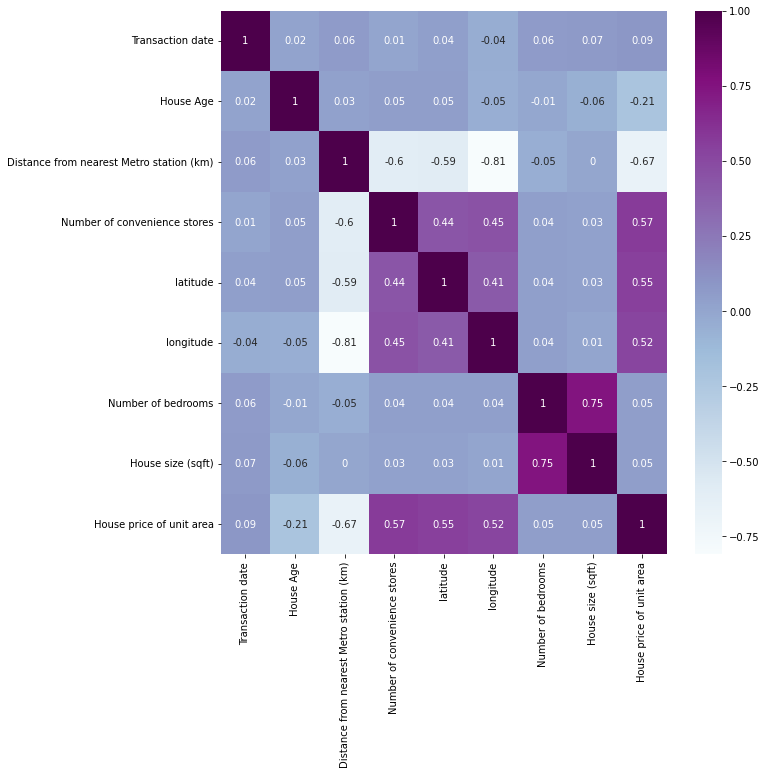

In [ ]:
#Heat Map for finding the positive and negative correlation between features 
plt.figure(figsize=((10,10)))
sns.heatmap(np.round(df.corr(),2),annot=True,cmap='BuPu')


Now let's see separately how house price varies with various features 





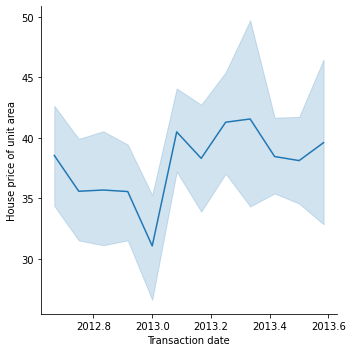

In [ ]:
#1)Transaction date
sns.relplot(data=df, x="Transaction date", y="House price of unit area", kind="line")

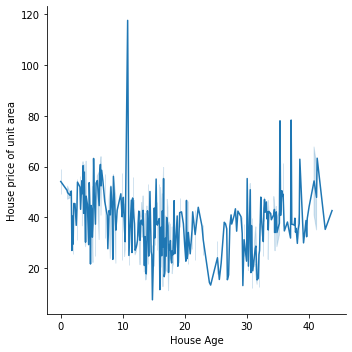

In [ ]:
#2)House Age
sns.relplot(data=df, x="House Age", y="House price of unit area", kind="line")

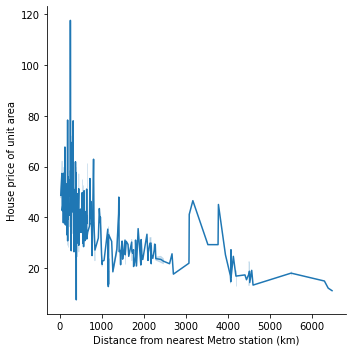

In [ ]:
#3)Distance from nearest Metro station (km)
sns.relplot(data=df, x="Distance from nearest Metro station (km)", y="House price of unit area", kind="line")

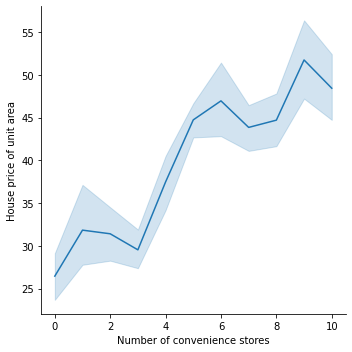

In [ ]:
#4)Number of convenience stores
sns.relplot(data=df, x="Number of convenience stores", y="House price of unit area", kind="line")

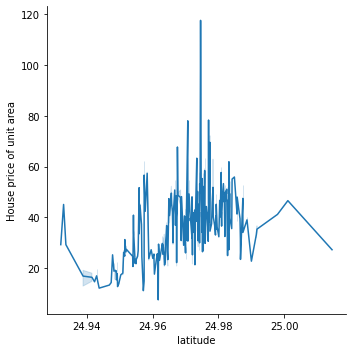

In [ ]:
#5)latitude
sns.relplot(data=df, x="latitude", y="House price of unit area", kind="line")

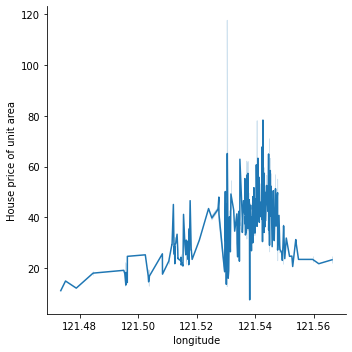

In [ ]:
#6)longitude
sns.relplot(data=df, x="longitude", y="House price of unit area", kind="line")

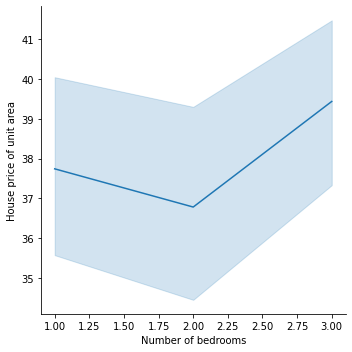

In [ ]:
#7)Number of bedrooms
sns.relplot(data=df, x="Number of bedrooms", y="House price of unit area", kind="line")

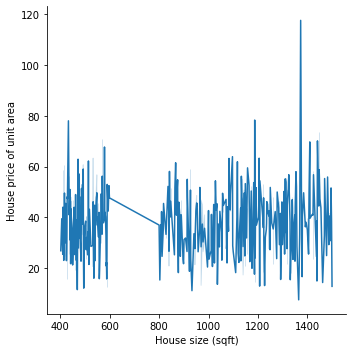

In [ ]:
#8)House size (sqft)
sns.relplot(data=df, x="House size (sqft)", y="House price of unit area", kind="line")

#5)Splitting Dataset into Dependent and independent feature

In [ ]:
X=df.drop(columns=['House price of unit area'])
y=pd.DataFrame(df['House price of unit area'])


#6)Splitting dependent and independent fetures into train and test dataset 

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

#7)Train, Test data preprocessing 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train=sc.fit_transform(y_train)
y_test=sc.transform (y_test)

#8)Building Regression Models

In [ ]:
wb = Workbook()
ws =  wb.active
ws.title = "Changed Sheet"
wb.save(filename = 'sample_book.xlsx')
ws.append(['Model','RMSE for train data','RMSE for test data'])



#**Linear Regression** 






In [ ]:
# loading the linear regression model 
lin_reg_model = LinearRegression() 
lin_reg_model.fit(X_train,y_train) 

LinearRegression()

In [ ]:
train1_predict = lin_reg_model.predict(X_train) 
test1_predict= lin_reg_model.predict(X_test) 

In [ ]:

train1_score = metrics.r2_score(y_train,train1_predict) 
test1_score=metrics.r2_score(y_test,test1_predict)
 
#Training data
# print("R squared Error - Train data: ", train1_score) 
x1=(np.sqrt(mean_squared_error(y_train, train1_predict)))
print('RMSE train data: %.3f' % (np.sqrt(mean_squared_error(y_train, train1_predict))))
# print('R^2 train data: %.3f' % (r2_score(y_train,train1_predict)))
 
#Testing Data
# print("R squared Error - Testing data: ",test1_score ) 
y1=(np.sqrt(mean_squared_error(y_test, test1_predict)))
print('RMSE test data: %.3f' % (np.sqrt(mean_squared_error(y_test, test1_predict))))
# print('R^2 test data: %.3f' % (r2_score(y_test,test1_predict)))
ws.append(['Linear Regression',x1,y1])

RMSE train data: 0.648
RMSE test data: 0.605


#**Ridge Regression**

In [ ]:
#Creating a pipeline with Ridge model 
pipeline = make_pipeline(Ridge(alpha=1.0))
pipeline.fit(X_train, y_train)


Pipeline(steps=[('ridge', Ridge())])

In [ ]:
train2_predict = pipeline.predict(X_train) 
test2_predict= pipeline.predict(X_test) 

In [ ]:
train2_score = metrics.r2_score(y_train,train2_predict) 
test2_score=metrics.r2_score(y_test,test2_predict)
 
#Training data
# print("R squared Error - Train data: ", train2_score) 
x2=(np.sqrt(mean_squared_error(y_train, train2_predict)) )
print('RMSE train data: %.3f' % (np.sqrt(mean_squared_error(y_train, train2_predict)) ))
# print('R^2 train data: %.3f' % (r2_score(y_train,train2_predict)))
 
#Testing Data
# print("R squared Error - Testing data: ",test2_score ) 
y2=(np.sqrt(mean_squared_error(y_test, test2_predict)))
print('RMSE test data: %.3f' % (np.sqrt(mean_squared_error(y_test, test2_predict))))
# print('R^2 test data: %.3f' % (r2_score(y_test,test2_predict)))

ws.append(['Ridge Regression',x2,y2])

RMSE train data: 0.648
RMSE test data: 0.605


#**Neural Network Regressor**

In [ ]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01

# Creating model using the Sequential in tensorflow

def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model


In [ ]:
# build the model
model_NN = build_model_using_sequential()
# loss function
msle = MeanSquaredLogarithmicError()
model_NN.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)

# train the model
history = model_NN.fit(
    X_train, 
    y_train, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
4/4 [==============================] - 3s 146ms/step - loss: 0.1947 - mean_squared_logarithmic_error: 0.1912 - val_loss: 0.1562 - val_mean_squared_logarithmic_error: 0.1562
Epoch 2/10
4/4 [==============================] - 0s 33ms/step - loss: 0.0820 - mean_squared_logarithmic_error: 0.0814 - val_loss: 0.1026 - val_mean_squared_logarithmic_error: 0.1026
Epoch 3/10
4/4 [==============================] - 0s 29ms/step - loss: 0.0704 - mean_squared_logarithmic_error: 0.0696 - val_loss: 0.0955 - val_mean_squared_logarithmic_error: 0.0955
Epoch 4/10
4/4 [==============================] - 0s 32ms/step - loss: 0.0590 - mean_squared_logarithmic_error: 0.0582 - val_loss: 0.0957 - val_mean_squared_logarithmic_error: 0.0957
Epoch 5/10
4/4 [==============================] - 0s 45ms/step - loss: 0.0522 - mean_squared_logarithmic_error: 0.0522 - val_loss: 0.0908 - val_mean_squared_logarithmic_error: 0.0908
Epoch 6/10
4/4 [==============================] - 0s 23ms/step - loss: 0.0521 - mean

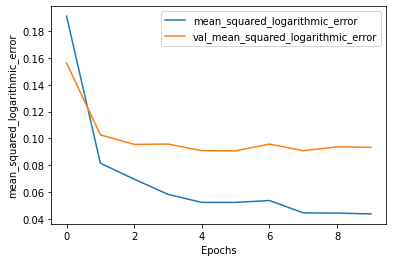

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [ ]:
train3_predict = model_NN.predict(X_train) 
test3_predict=model_NN.predict(X_test) 

train3_score = metrics.r2_score(y_train,train3_predict) 
test3_score=metrics.r2_score(y_test,test3_predict)
 
#Training data
# print("R squared Error - Train data: ", train3_score) 
x3=(np.sqrt(mean_squared_error(y_train, train3_predict)))
print('RMSE train data: %.3f' % (np.sqrt(mean_squared_error(y_train, train3_predict)) ))
# print('R^2 train data: %.3f' % (r2_score(y_train,train3_predict)))
 
#Testing Data
# print("R squared Error - Testing data: ",test3_score ) 
y3=(np.sqrt(mean_squared_error(y_test, test3_predict)))
print('RMSE test data: %.3f' % (np.sqrt(mean_squared_error(y_test, test3_predict))))
# print('R^2 test data: %.3f' % (r2_score(y_test,test3_predict)))

ws.append(['Neural Network Regression',x3,y3])

4/4 [==============================] - 0s 11ms/step
RMSE train data: 0.734
RMSE test data: 0.730


#**Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

Lasso()

In [ ]:
train4_predict = lasso_reg.predict(X_train) 
test4_predict= lasso_reg.predict(X_test) 

train4_score = metrics.r2_score(y_train,train4_predict) 
test4_score=metrics.r2_score(y_test,test4_predict)
 
#Training data
# print("R squared Error - Train data: ", train4_score) 
x4=(np.sqrt(mean_squared_error(y_train, train4_predict)) )
print('RMSE train data: %.3f' % (np.sqrt(mean_squared_error(y_train, train4_predict)) ))
# print('R^2 train data: %.3f' % (r2_score(y_train,train4_predict)))
 
#Testing Data
# print("R squared Error - Testing data: ",test4_score ) 
y4=(np.sqrt(mean_squared_error(y_test, test4_predict)))
print('RMSE test data: %.3f' % (np.sqrt(mean_squared_error(y_test, test4_predict))))
# print('R^2 test data: %.3f' % (r2_score(y_test,test4_predict)))

ws.append(['Lasso Regression',x4,y4])

RMSE train data: 1.000
RMSE test data: 0.938


#**Decision Tree Regressor**

In [ ]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
train5_predict = regressor.predict(X_train) 
test5_predict= regressor.predict(X_test) 

train5_score = metrics.r2_score(y_train,train5_predict) 
test5_score=metrics.r2_score(y_test,test5_predict)
 
#Training data
# print("R squared Error - Train data: ", train5_score) 
x5=(np.sqrt(mean_squared_error(y_train, train5_predict)) )
print('RMSE train data: %.3f' % (np.sqrt(mean_squared_error(y_train, train5_predict)) ))
# print('R^2 train data: %.3f' % (r2_score(y_train,train5_predict)))
 
#Testing Data
# print("R squared Error - Testing data: ",test5_score ) 
y5=(np.sqrt(mean_squared_error(y_test, test5_predict)))
print('RMSE test data: %.3f' % (np.sqrt(mean_squared_error(y_test, test5_predict))))
# print('R^2 test data: %.3f' % (r2_score(y_test,test5_predict)))

ws.append(['Decision Tree Regressor',x5,y5])

RMSE train data: 0.000
RMSE test data: 0.685


#**Random Forest Regressor**

In [ ]:
# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

regressor.fit(X_train, y_train) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(random_state=0)

In [ ]:
train6_predict = regressor.predict(X_train) 
test6_predict= regressor.predict(X_test) 

train6_score = metrics.r2_score(y_train,train6_predict) 
test6_score=metrics.r2_score(y_test,test6_predict)
 
#Training data
# print("R squared Error - Train data: ", train6_score) 
x6=(np.sqrt(mean_squared_error(y_train, train6_predict)) )
print('RMSE train data: %.3f' % (np.sqrt(mean_squared_error(y_train, train6_predict)) ))
# print('R^2 train data: %.3f' % (r2_score(y_train,train6_predict)))
 
#Testing Data
# print("R squared Error - Testing data: ",test6_score ) 
y6=(np.sqrt(mean_squared_error(y_test, test6_predict)))
print('RMSE test data: %.3f' % (np.sqrt(mean_squared_error(y_test, test6_predict))))
# print('R^2 test data: %.3f' % (r2_score(y_test,test6_predict)))

ws.append(['Random Forest Regressor',x6,y6])

RMSE train data: 0.211
RMSE test data: 0.480


#**KNeighbors Regressor**

In [ ]:

RegModel = KNeighborsRegressor(n_neighbors=2)
KNN=RegModel.fit(X_train,y_train)

In [ ]:
train7_predict = RegModel.predict(X_train) 
test7_predict= RegModel.predict(X_test) 

train7_score = metrics.r2_score(y_train,train7_predict) 
test7_score=metrics.r2_score(y_test,test7_predict)
 
#Training data
# print("R squared Error - Train data: ", train7_score) 
x7= (np.sqrt(mean_squared_error(y_train, train7_predict)) )
print('RMSE train data: %.3f' % (np.sqrt(mean_squared_error(y_train, train7_predict)) ))
# print('R^2 train data: %.3f' % (r2_score(y_train,train7_predict)))
 
#Testing Data
# print("R squared Error - Testing data: ",test7_score ) 
y7=(np.sqrt(mean_squared_error(y_test, test7_predict)))
print('RMSE test data: %.3f' % (np.sqrt(mean_squared_error(y_test, test7_predict))))
# print('R^2 test data: %.3f' % (r2_score(y_test,test7_predict)))

ws.append(['KNeighbors Regressor',x7,y7])

RMSE train data: 0.460
RMSE test data: 0.606


#**Support Vector Regressor**

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
train8_predict = regressor.predict(X_train) 
test8_predict= regressor.predict(X_test) 

train8_score = metrics.r2_score(y_train,train8_predict) 
test8_score=metrics.r2_score(y_test,test8_predict)
 
#Training data
# print("R squared Error - Train data: ", train8_score) 
x8=(np.sqrt(mean_squared_error(y_train, train8_predict)))
print('RMSE train data: %.3f' % (np.sqrt(mean_squared_error(y_train, train8_predict))))
# print('R^2 train data: %.3f' % (r2_score(y_train,train8_predict)))
 
#Testing Data
# print("R squared Error - Testing data: ",test8_score ) 
y8=(np.sqrt(mean_squared_error(y_test, test8_predict)))
print('RMSE test data: %.3f' % (np.sqrt(mean_squared_error(y_test, test8_predict))))
# print('R^2 test data: %.3f' % (r2_score(y_test,test8_predict)))

ws.append(['Support Vector Regressor',x8,y8])

RMSE train data: 0.520
RMSE test data: 0.515


#**Gaussian Process Regressor**

In [ ]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=9)

In [ ]:
train9_predict = gaussian_process.predict(X_train) 
test9_predict= gaussian_process.predict(X_test) 

train9_score = metrics.r2_score(y_train,train9_predict) 
test9_score=metrics.r2_score(y_test,test9_predict)
 
#Training data
# print("R squared Error - Train data: ", train9_score) 
x9=(np.sqrt(mean_squared_error(y_train, train9_predict)))
print('RMSE train data: %.3f' % (np.sqrt(mean_squared_error(y_train, train9_predict))))
# print('R^2 train data: %.3f' % (r2_score(y_train,train9_predict)))
 
#Testing Data
# print("R squared Error - Testing data: ",test9_score ) 
y9=(np.sqrt(mean_squared_error(y_test, test9_predict)))
print('RMSE test data: %.3f' % (np.sqrt(mean_squared_error(y_test, test9_predict))))
# print('R^2 test data: %.3f' % (r2_score(y_test,test9_predict)))

ws.append(['Gaussian process Regressor',x9,y9])

RMSE train data: 0.000
RMSE test data: 0.657


In [ ]:
wb.save('sample_book.xlsx')

In [ ]:
df=pd.read_excel('sample_book.xlsx')
df

,Model,RMSE for train data,RMSE for test data
0,Linear Regression,6.482236e-01,0.605185
1,Ridge Regression,6.482299e-01,0.604602
2,Neural Network Regression,7.341946e-01,0.729807
3,Lasso Regression,1.000000e+00,0.937725
4,Decision Tree Regressor,0.000000e+00,0.684749
5,Random Forest Regressor,2.106156e-01,0.480301
6,KNeighbors Regressor,4.599875e-01,0.606156
7,Support Vector Regressor,5.197286e-01,0.514983
8,Gaussian process Regressor,1.663841e-10,0.656601


# As from above dataset we can draw inference that **Random Forest Regressor** is the best model for this problem as it has less training and testing Root mean sqaured error compared to other models 